### Applied Machine Learning 5b

##### Date: May 1 2020
##### Author: Jung Ah Shin 
##### Data source: Fashion MNIST Dataset (Keras)


*RUN A MULTILAYER PERCEPTRON (FULLY CONNECTED NEURAL NETWORK) ON FASHION MNIST DATASET (KERAS)*

* Drop-out
* Batch Normalization


In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation

import keras
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

from keras.datasets import fashion_mnist

from keras.layers import Dropout

In [ ]:
# Preprocessing
# 28*28 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_train /= 255

print(X_train.shape[0], ' train_samples')
print(X_test.shape[0], ' test samples')

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 0s 0us/step
60000  train_samples
10000  test samples


In [ ]:
# Train a multilayer perceptron (fully connected)

#Use a separate 10000 samples (from the training set) for model selection and 
# to compute learning curves (accuracy vs epochs, not accuracy vs n_samples).

model = Sequential([
                Dense(128, input_shape=(784,), activation='relu'),
                Dense(64, activation='relu'),
                Dense(10, activation='softmax')
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])


history_callback = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9809 - accuracy: 0.6535 - val_loss: 0.7023 - val_accuracy: 0.7443
Epoch 2/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.6333 - accuracy: 0.7683 - val_loss: 0.6055 - val_accuracy: 0.7812
Epoch 3/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.5628 - accuracy: 0.7968 - val_loss: 0.5582 - val_accuracy: 0.7911
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.5200 - accuracy: 0.8148 - val_loss: 0.5110 - val_accuracy: 0.8136
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.4895 - accuracy: 0.8270 - val_loss: 0.4869 - val_accuracy: 0.8300
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.4651 - accuracy: 0.8339 - val_loss: 0.4625 - val_accuracy: 0.8324
Epoch 7/50
50000/50000 [==============================] - 5s 98

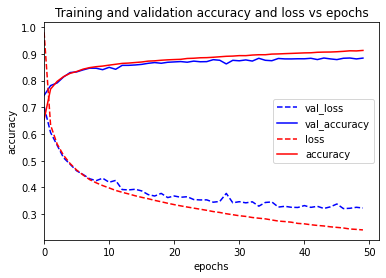

In [ ]:
pd.DataFrame(history_callback.history).plot(color=['b','b','r','r'], style=['--','-','--','-'])
plt.xlim(xmin=0)
plt.title('Training and validation accuracy and loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy');

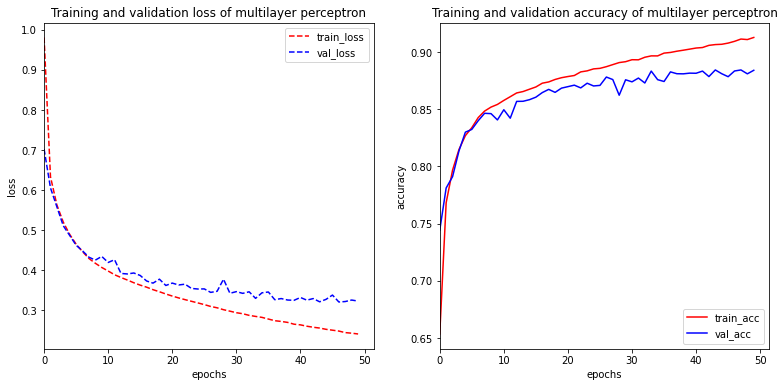

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(13,6))
ax[0].plot(np.arange(0, N), history_callback.history["loss"], 'r--',label="train_loss") 
ax[0].plot(np.arange(0, N), history_callback.history["val_loss"],'b--', label="val_loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Training and validation loss of multilayer perceptron')
ax[0].set_xlim(xmin=0)
ax[0].legend(loc="upper right")

ax[1].plot(np.arange(0, N), history_callback.history["accuracy"], label="train_acc", color='red')
ax[1].plot(np.arange(0, N), history_callback.history["val_accuracy"], label="val_acc",color='blue')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Training and validation accuracy of multilayer perceptron');
ax[1].set_xlim(xmin=0)
ax[1].legend(loc="lower right");

#### Drop-out model

In [ ]:
# Compare a “vanilla” model with a model using drop-out 
# Evaluate if using drop-out allows you to learn a bigger network.

#drop_out model 
model_dropout = Sequential([
                            Dense(128, input_shape=(784,), activation='relu'),
                            Dropout(.5),
                            Dense(64, activation='relu'),
                            Dropout(.5),
                            Dense(10, activation='softmax')                   
])


In [ ]:
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_dropout.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                                    epochs=50, verbose=1, validation_split=1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.5930 - accuracy: 0.3856 - val_loss: 1.0284 - val_accuracy: 0.6081
Epoch 2/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.0503 - accuracy: 0.5907 - val_loss: 0.7856 - val_accuracy: 0.7230
Epoch 3/50
50000/50000 [==============================] - 1s 30us/step - loss: 0.8855 - accuracy: 0.6663 - val_loss: 0.6848 - val_accuracy: 0.7450
Epoch 4/50
50000/50000 [==============================] - 1s 29us/step - loss: 0.8085 - accuracy: 0.6973 - val_loss: 0.6358 - val_accuracy: 0.7598
Epoch 5/50
50000/50000 [==============================] - 1s 29us/step - loss: 0.7547 - accuracy: 0.7212 - val_loss: 0.6056 - val_accuracy: 0.7668
Epoch 6/50
50000/50000 [==============================] - 1s 29us/step - loss: 0.7226 - accuracy: 0.7311 - val_loss: 0.5805 - val_accuracy: 0.7776
Epoch 7/50
50000/50000 [==============================] - 1s 29us/st

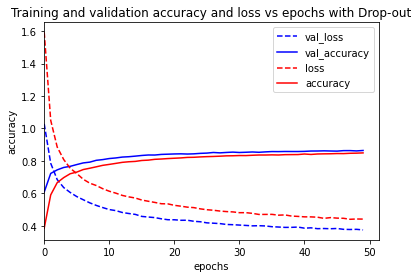

In [ ]:
pd.DataFrame(history_dropout.history).plot(color=['b','b','r','r'], style=['--','-','--','-'])
plt.xlim(xmin=0)
plt.title('Training and validation accuracy and loss vs epochs with Drop-out')
plt.xlabel('epochs')
plt.ylabel('accuracy');

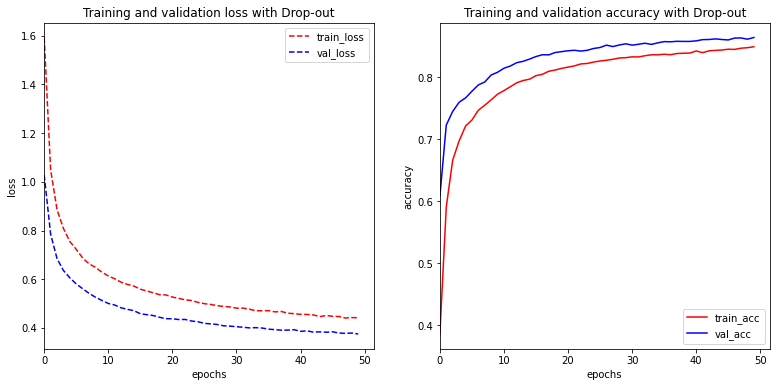

In [ ]:
N = 50 #epochs 

fig,ax = plt.subplots(1,2, figsize=(13,6))
ax[0].plot(np.arange(0, N), history_dropout.history["loss"], 'r--',label="train_loss") 
ax[0].plot(np.arange(0, N), history_dropout.history["val_loss"],'b--', label="val_loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Training and validation loss with Drop-out')
ax[0].set_xlim(xmin=0)
ax[0].legend(loc="upper right")

ax[1].plot(np.arange(0, N), history_dropout.history["accuracy"], label="train_acc", color='red')
ax[1].plot(np.arange(0, N), history_dropout.history["val_accuracy"], label="val_acc",color='blue')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Training and validation accuracy with Drop-out');
ax[1].set_xlim(xmin=0)
ax[1].legend(loc="lower right");

#### Batch Normalization

In [ ]:
# Batch normalization

from keras.layers import BatchNormalization

model_batch = Sequential([
                          Dense(128, input_shape=(784,), activation='relu'),
                          BatchNormalization(),
                          Dense(64, activation='relu'),
                          BatchNormalization(),
                          Dense(10, activation='softmax')
])


model_batch.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 110,154
Trainable params: 109,770
Non-trainable params: 384
_________________________________________________________________


In [ ]:
model_batch.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
history_batch = model_batch.fit(X_train, y_train, batch_size=128,
                                    epochs=50, verbose=1, validation_split=1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5088 - accuracy: 0.8211 - val_loss: 1.7319 - val_accuracy: 0.5120
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.3847 - accuracy: 0.8617 - val_loss: 0.4262 - val_accuracy: 0.8506
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.3507 - accuracy: 0.8728 - val_loss: 0.4570 - val_accuracy: 0.8272
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.3258 - accuracy: 0.8809 - val_loss: 0.3881 - val_accuracy: 0.8586
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.3088 - accuracy: 0.8871 - val_loss: 0.4532 - val_accuracy: 0.8342
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.2935 - accuracy: 0.8920 - val_loss: 0.4943 - val_accuracy: 0.8295
Epoch 7/50
50000/50000 [==============================] - 2s 41us/st

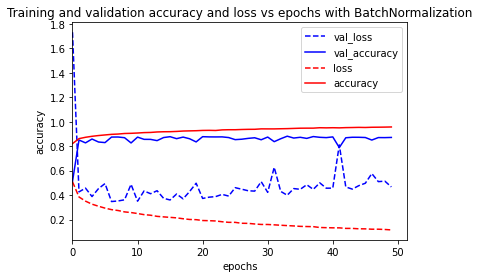

In [ ]:
pd.DataFrame(history_batch.history).plot(color=['b','b','r','r'], style=['--','-','--','-'])
plt.xlim(xmin=0)
plt.title('Training and validation accuracy and loss vs epochs with BatchNormalization')
plt.xlabel('epochs')
plt.ylabel('accuracy');

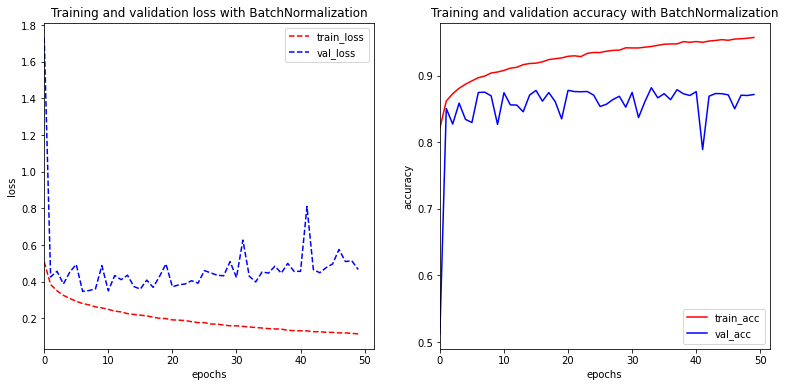

In [ ]:
N = 50 #epochs 

fig,ax = plt.subplots(1,2, figsize=(13,6))
ax[0].plot(np.arange(0, N), history_batch.history["loss"], 'r--',label="train_loss") 
ax[0].plot(np.arange(0, N), history_batch.history["val_loss"],'b--', label="val_loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Training and validation loss with BatchNormalization')
ax[0].set_xlim(xmin=0)
ax[0].legend(loc="upper right")

ax[1].plot(np.arange(0, N), history_batch.history["accuracy"], label="train_acc", color='red')
ax[1].plot(np.arange(0, N), history_batch.history["val_accuracy"], label="val_acc",color='blue')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Training and validation accuracy with BatchNormalization');
ax[1].set_xlim(xmin=0)
ax[1].legend(loc="lower right");
